In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import pickle
import os
import sys
import copy

pp_path = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(pp_path)
os.environ["PYTHONPATH"] = pp_path + ":" + os.environ.get("PYTHONPATH", "")
from utils import *
pd.options.mode.chained_assignment = None # None / 'warn'
pd.set_option('display.max_columns', None)

In [2]:
### read dataset

# source: https://www.kaggle.com/datasets/markjibrilmononutu/statlog-landsat-satellite-data-set
datapath_tr = '../data_raw/SatIm/sat_train.csv'
datapath_te = '../data_raw/SatIm/sat_test.csv'
df_tr = pd.read_csv(datapath_tr)
df_te = pd.read_csv(datapath_te)
df = pd.concat([df_tr, df_te], ignore_index=False, copy=False)
num_train = len(df_tr)
df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,co.30,col31,col32,col33,col34,col35,label
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,104,88,59,83,100,83,63,87,100,87,63,83,104,87,66,91,104,92,66,87,108,89,63,83,104,85,1
1996,64,79,100,85,56,71,96,85,56,68,91,81,63,79,100,87,59,75,96,87,59,72,96,83,63,83,100,85,66,83,100,85,63,83,100,81,1
1997,56,68,91,81,56,64,91,81,53,64,83,78,59,72,96,83,59,75,96,75,59,75,89,75,63,83,100,81,59,87,96,81,63,83,92,74,5
1998,56,68,87,74,60,71,91,81,60,64,104,99,59,79,89,71,63,79,93,75,63,68,109,92,59,83,96,74,59,83,92,74,59,83,92,70,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col0    6435 non-null   int64
 1   col1    6435 non-null   int64
 2   col2    6435 non-null   int64
 3   col3    6435 non-null   int64
 4   col4    6435 non-null   int64
 5   col5    6435 non-null   int64
 6   col6    6435 non-null   int64
 7   col7    6435 non-null   int64
 8   col8    6435 non-null   int64
 9   col9    6435 non-null   int64
 10  col10   6435 non-null   int64
 11  col11   6435 non-null   int64
 12  col12   6435 non-null   int64
 13  col13   6435 non-null   int64
 14  col14   6435 non-null   int64
 15  col15   6435 non-null   int64
 16  col16   6435 non-null   int64
 17  col17   6435 non-null   int64
 18  col18   6435 non-null   int64
 19  col19   6435 non-null   int64
 20  col20   6435 non-null   int64
 21  col21   6435 non-null   int64
 22  col22   6435 non-null   int64
 23  col23   6435 

In [4]:
# check for missing values

df.isnull().sum().sum()

0

In [5]:
### preprocessing columns

# assign the column name of the target feature as "Target"
df.rename(columns={"label":"Target"}, inplace=True)

# make sure the label ranges from 0 to (num_class-1)
df["Target"] = LabelEncoder().fit_transform(df["Target"])

print('\ndata shape: ', df.shape, sep='')
print('\ncolumn names:\n', list(df.columns), sep='')
print('\nclass distribution:\n', df.Target.value_counts(), sep='')
print('\ncolumn types:\n', df.dtypes, sep='')


data shape: (6435, 37)

column names:
['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'co.30', 'col31', 'col32', 'col33', 'col34', 'col35', 'Target']

class distribution:
0    1533
5    1508
2    1358
4     707
1     703
3     626
Name: Target, dtype: int64

column types:
col0      int64
col1      int64
col2      int64
col3      int64
col4      int64
col5      int64
col6      int64
col7      int64
col8      int64
col9      int64
col10     int64
col11     int64
col12     int64
col13     int64
col14     int64
col15     int64
col16     int64
col17     int64
col18     int64
col19     int64
col20     int64
col21     int64
col22     int64
col23     int64
col24     int64
col25     int64
col26     int64
col27     int64
col28     int64
col29     int64
co.30     int64
col31     int64
c

In [6]:
continuous_features = list(OrderedSet(df.columns.to_list()) - OrderedSet(["Target"])) ###
categorical_features = list(OrderedSet(df.columns.to_list()) - OrderedSet(["Target"]) - OrderedSet(continuous_features))
print('continuous_features:', continuous_features)
print('\ncategorical_features:', categorical_features)

continuous_features: ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'co.30', 'col31', 'col32', 'col33', 'col34', 'col35']

categorical_features: []


In [7]:
df.describe(include='all')

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,co.30,col31,col32,col33,col34,col35,Target
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,98.853302,82.388190,69.289666,83.476768,99.311267,82.644911,69.045688,83.171096,99.149806,82.603263,68.839316,82.860917,98.949650,82.468531,69.162393,83.373427,99.214763,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361,2.434343
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,16.636608,18.981112,13.602694,22.849895,16.667866,18.931989,13.537618,22.905065,16.717671,19.035543,13.459225,22.884380,16.729623,19.070751,13.580516,22.802737,16.612514,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274,1.876139
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,0.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,1.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,68.000000,85.000000,101.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000,2.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,4.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,104.000000,137.000000,145.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,104.000000,131.000000,140.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,5.000000


In [8]:
# shuffle and split data into train/(val)/test

seed = 0
df_train = shuffle_data(df.iloc[:num_train,:], seed=seed)
df_test = shuffle_data(df.iloc[num_train:,:], seed=seed)

print('train:', df_train.shape)
print(np.unique(df_train.Target, return_counts=True))
print('\ntest:', df_test.shape)
print(np.unique(df_test.Target, return_counts=True))

train: (4435, 37)
(array([0, 1, 2, 3, 4, 5]), array([1072,  479,  961,  415,  470, 1038]))

test: (2000, 37)
(array([0, 1, 2, 3, 4, 5]), array([461, 224, 397, 211, 237, 470]))


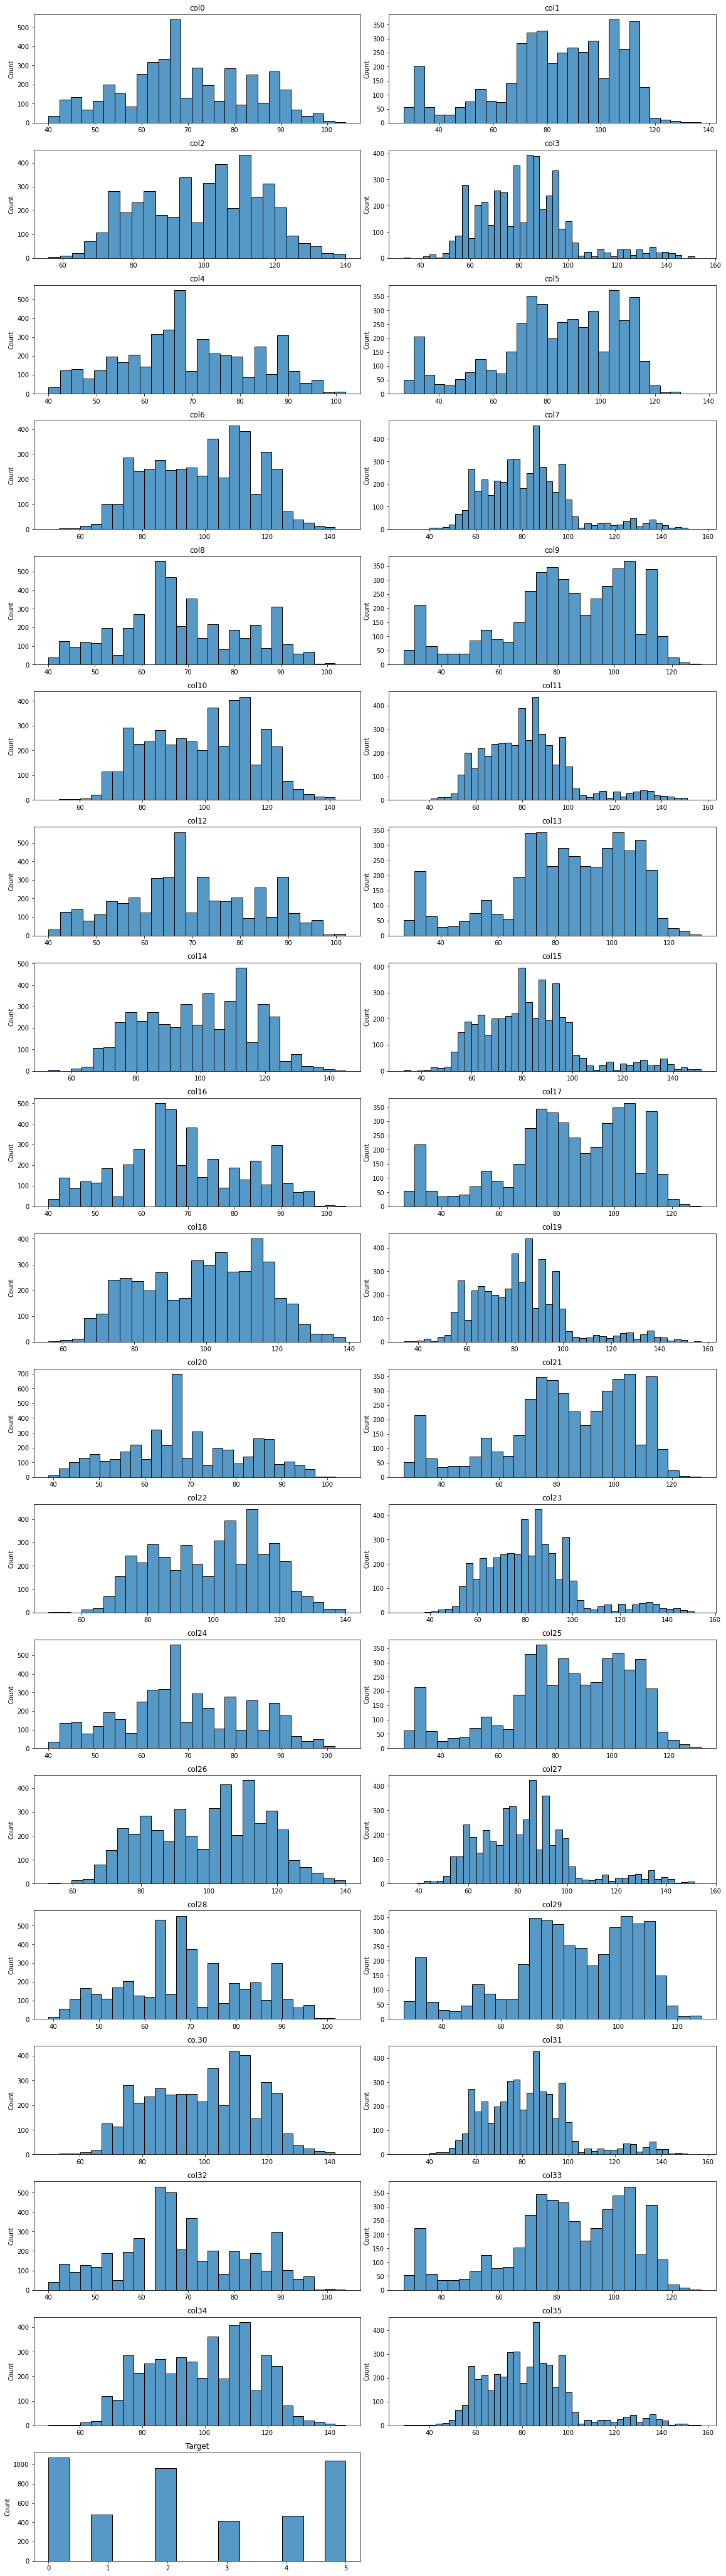

In [9]:
# plot histograms of the training data

ncol, nrow = 2, int(np.ceil(len(df_train.columns)/2))
figsize = (16,3*nrow)

plot_hist(df_train, figsize, nrow, ncol)

In [10]:
# scaling

for feature in continuous_features:
    lower = np.percentile(df_train[feature], 1)
    upper = np.percentile(df_train[feature], 99)

    df_train.loc[df_train[feature]<lower, feature] = lower
    df_train.loc[df_train[feature]>upper, feature] = upper
    df_test.loc[df_test[feature]<lower, feature] = lower
    df_test.loc[df_test[feature]>upper, feature] = upper

scaler_list = [MinMaxScaler(clip=True), MinMaxScaler(clip=True)]   ### StandardScaler() / MinMaxScaler(clip=True)
feature_list = [continuous_features, categorical_features]
df_train_scaled, df_test_scaled = scale_features(df_train, df_test, feature_list, scaler_list)

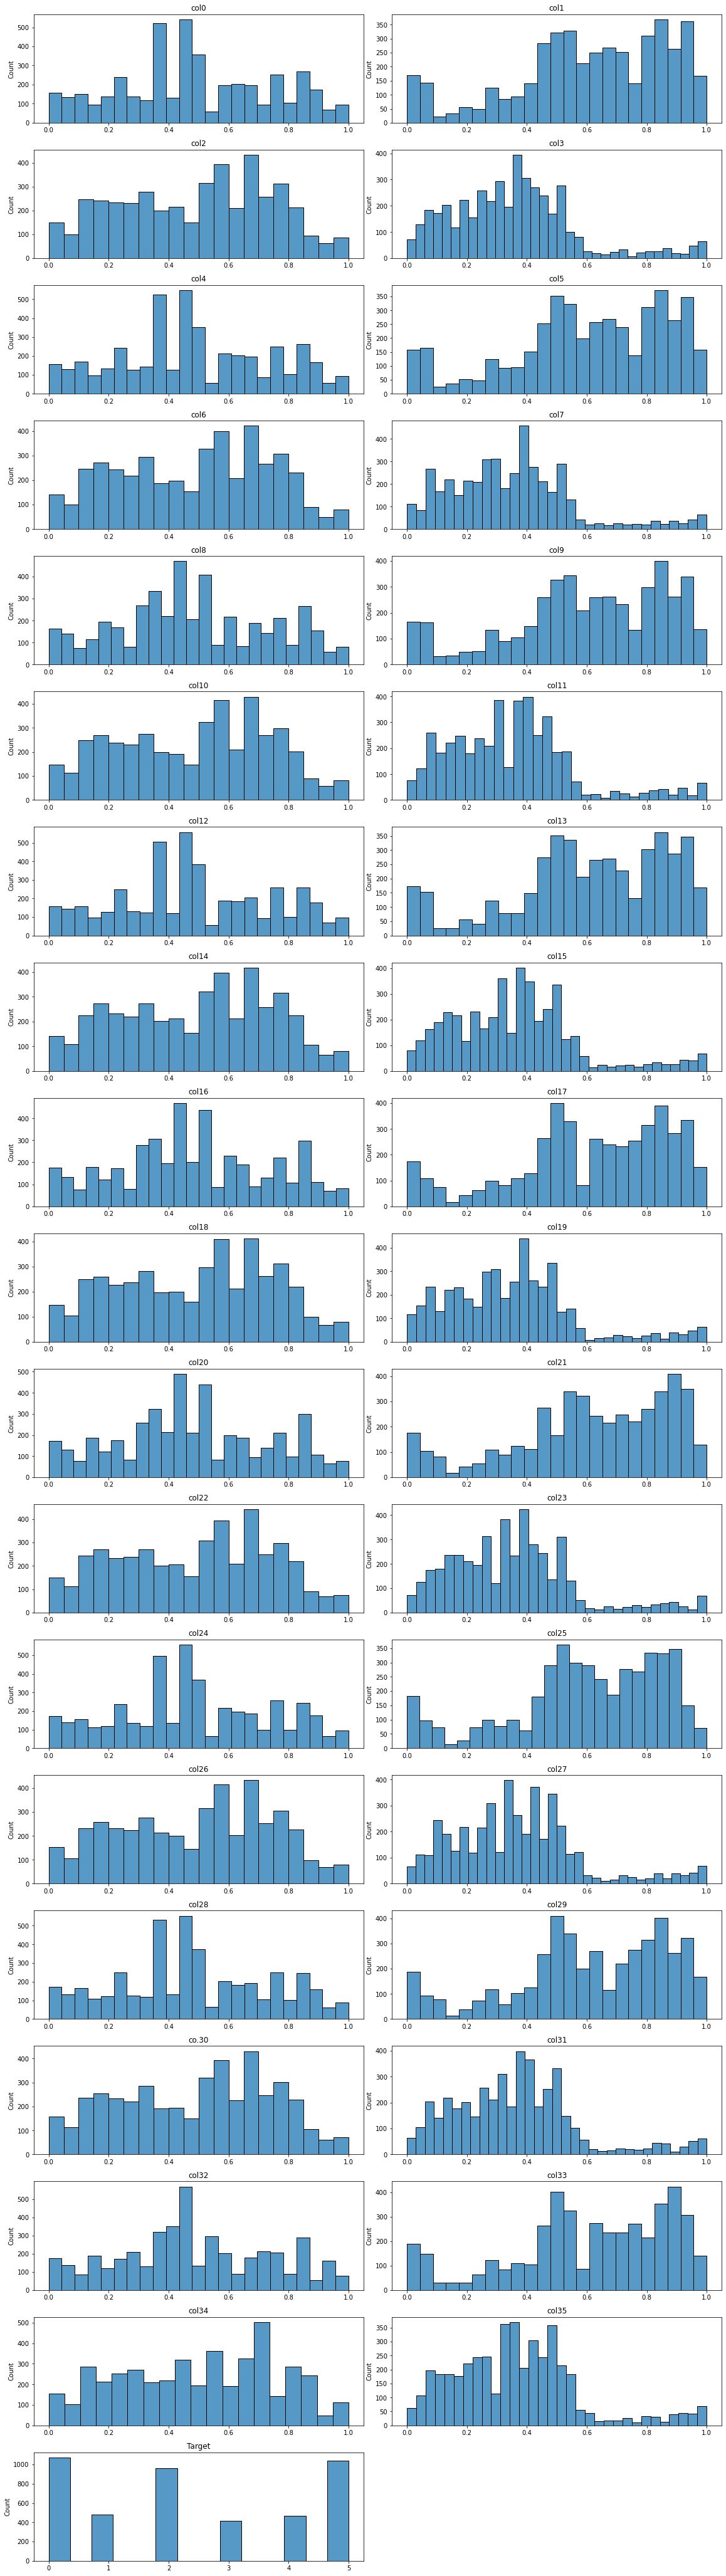

In [11]:
plot_hist(df_train_scaled, figsize, nrow, ncol)

In [12]:
df_train_scaled

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,co.30,col31,col32,col33,col34,col35,Target
0,0.185185,0.215909,0.166667,0.078652,0.314815,0.340909,0.166667,0.154072,0.447261,0.511364,0.272727,0.244444,0.185185,0.215909,0.106061,0.068182,0.388889,0.451162,0.287879,0.227273,0.611111,0.636364,0.409091,0.280990,0.314815,0.274725,0.121212,0.101124,0.518519,0.561798,0.363636,0.311111,0.698113,0.793103,0.578125,0.314607,4
1,0.462963,0.511364,0.181818,0.089888,0.462963,0.511364,0.181818,0.086397,0.316810,0.511364,0.181818,0.088889,0.518519,0.511364,0.151515,0.079545,0.518519,0.518836,0.106061,0.068182,0.444444,0.522727,0.151515,0.083881,0.500000,0.505495,0.090909,0.101124,0.500000,0.516854,0.136364,0.100000,0.377358,0.517241,0.203125,0.101124,5
2,0.462963,0.465909,0.121212,0.089888,0.462963,0.511364,0.121212,0.086397,0.391353,0.511364,0.181818,0.088889,0.444444,0.511364,0.212121,0.125000,0.444444,0.518836,0.212121,0.113636,0.444444,0.568182,0.212121,0.127683,0.500000,0.505495,0.136364,0.101124,0.425926,0.561798,0.196970,0.177778,0.433962,0.517241,0.265625,0.179775,5
3,0.851852,0.863636,0.651515,0.438202,0.925926,0.920455,0.712121,0.436048,0.931793,0.965909,0.651515,0.433333,0.907407,0.920455,0.727273,0.454545,1.000000,0.969998,0.727273,0.443182,1.000000,0.977273,0.803030,0.478099,0.907407,0.857143,0.696970,0.426966,0.907407,0.876404,0.772727,0.466667,1.000000,0.942529,0.859375,0.426966,2
4,0.444444,0.829545,0.636364,0.460674,0.370370,0.738636,0.636364,0.402211,0.298174,0.738636,0.696970,0.455556,0.370370,0.647727,0.621212,0.431818,0.370370,0.699301,0.681818,0.420455,0.370370,0.761364,0.681818,0.423346,0.444444,0.813187,0.712121,0.494382,0.370370,0.786517,0.712121,0.444444,0.377358,0.839080,0.734375,0.494382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,0.240741,0.238636,0.075758,0.101124,0.296296,0.272727,0.075758,0.097677,0.298174,0.238636,0.000000,0.000000,0.185185,0.215909,0.045455,0.045455,0.259259,0.304534,0.106061,0.113636,0.259259,0.352273,0.106061,0.083881,0.185185,0.252747,0.060606,0.000000,0.259259,0.292135,0.106061,0.122222,0.264151,0.287356,0.171875,0.168539,4
4431,0.259259,0.704545,0.712121,0.404494,0.259259,0.704545,0.575758,0.357095,0.260902,0.659091,0.575758,0.355556,0.185185,0.670455,0.590909,0.409091,0.185185,0.676743,0.590909,0.352273,0.185185,0.590909,0.530303,0.357643,0.185185,0.637363,0.560606,0.426966,0.185185,0.741573,0.621212,0.388889,0.188679,0.609195,0.515625,0.348315,0
4432,0.370370,0.465909,0.090909,0.044944,0.370370,0.465909,0.090909,0.041281,0.372717,0.420455,0.000000,0.044444,0.370370,0.454545,0.121212,0.022727,0.296296,0.417325,0.075758,0.011364,0.370370,0.420455,0.121212,0.072930,0.314815,0.417582,0.166667,0.056180,0.314815,0.426966,0.106061,0.055556,0.377358,0.425287,0.109375,0.089888,5
4433,0.518519,0.886364,0.787879,0.528090,0.444444,0.931818,0.712121,0.526280,0.447261,0.886364,0.863636,0.522222,0.444444,0.920455,0.787879,0.568182,0.444444,0.969998,0.787879,0.556818,0.444444,0.931818,0.787879,0.478099,0.462963,0.901099,0.727273,0.539326,0.462963,0.966292,0.803030,0.533333,0.471698,0.977011,0.906250,0.539326,0
